[View in Colaboratory](https://colab.research.google.com/github/snalla1019/skillantrophy/blob/master/Practice1.ipynb)

In [0]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [4]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.3 (default, Oct  3 2017, 21:45:48) 
[GCC 7.2.0]
Pandas version 0.22.0
Matplotlib version 2.1.2


In [0]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [0]:
zip?

In [8]:
BabyDataSet = list(zip(names,births))
type(BabyDataSet)

list

In [28]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [0]:
df.to_csv?

In [15]:
csv_test=df.to_csv('births1880.csv',index=False,header=False)
type(csv_test)

NoneType

The most popular name


,Names,Births
4,Mel,973


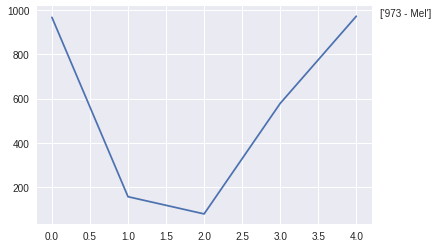

In [22]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()
MaxValue
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values
MaxName
# Text to display on graph
Text = str(MaxValue) + " - " + MaxName
Text
# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

In [26]:
len(df['Names'].unique())

5

In [0]:
print(df['Names'].describe())


In [32]:
print(df['Births'].describe())


count      5.000000
mean     550.200000
std      428.424672
min       77.000000
25%      155.000000
50%      578.000000
75%      968.000000
max      973.000000
Name: Births, dtype: float64


In [39]:
name=df.groupby('Names')
name.head()

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [41]:
df=name.sum()
df

,Births
Names,
Bob,968
Jessica,155
John,578
Mary,77
Mel,973


In [43]:
sorted=df.sort_values(['Births'], ascending=False)
#Sorted = df.sort_values(['Births'], ascending=False)
sorted


,Births
Names,
Mel,973
Bob,968
John,578
Jessica,155
Mary,77


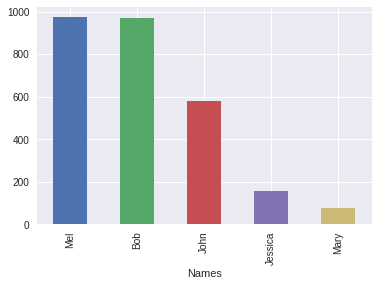

In [45]:
sorted['Births'].plot.bar()

In [0]:
import numpy.random as np

# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [55]:
rng = pd.date_range(start='1/1/2009', end='1/10/2009', freq='W-MON')
rng

DatetimeIndex(['2009-01-05'], dtype='datetime64[ns]', freq='W-MON')

In [0]:
pd.date_range?

In [53]:
dataset = CreateDataSet(4)
dataset[1:4]
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

[('NJ', 1, 412, Timestamp('2009-01-12 00:00:00', freq='W-MON')),
 ('GA', 2, 252, Timestamp('2009-01-19 00:00:00', freq='W-MON')),
 ('fl', 2, 443, Timestamp('2009-01-26 00:00:00', freq='W-MON'))]